# Chapter 3 example:
# Text Classification

## Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
 max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## Encoding the integer sequences into a binary matrix

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building your network

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [10]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

## Configuring the optimizer

In [11]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Using custom losses and metrics

In [12]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

## Setting aside a validation set

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [14]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 163ms/step - loss: 0.5201 - acc: 0.7746 - val_loss: 0.3893 - val_acc: 0.8684
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3195 - acc: 0.8909 - val_loss: 0.3206 - val_acc: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2349 - acc: 0.9231 - val_loss: 0.2811 - val_acc: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1879 - acc: 0.9385 - val_loss: 0.2882 - val_acc: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1581 - acc: 0.9482 - val_loss: 0.2899 - val_acc: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1328 - acc: 0.9583 - val_loss: 0.3079 - val_acc: 0.8791
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1073 - acc: 0.9684 - val_loss: 0.2989 - val_acc: 0.8832
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0942 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the training and validation loss

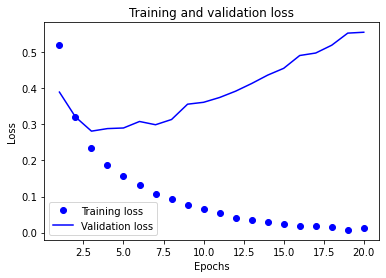

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the training and validation accuracy

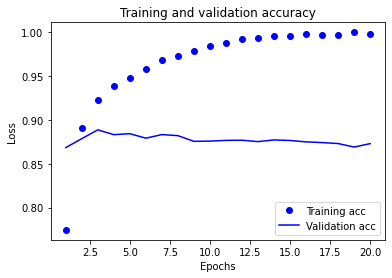

In [17]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining a model from scratch

In [18]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.4746 - accuracy: 0.8201
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2883 - accuracy: 0.8993
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2265 - accuracy: 0.9192
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2795 - accuracy: 0.8892


### The final results are as follows:

In [19]:
results

[0.27949172258377075, 0.8891599774360657]

## Using a trained network to generate predictions on new data

In [20]:
Y = model.predict(x_test)
Y

782/782 [==============================] - 3s 2ms/step


array([[0.2015703 ],
       [0.99883175],
       [0.8595695 ],
       ...,
       [0.08368828],
       [0.08701179],
       [0.6735638 ]], dtype=float32)

In [21]:
X = np.where(Y>0.5, "Positive", "Negative")
X

array([['Negative'],
       ['Positive'],
       ['Positive'],
       ...,
       ['Negative'],
       ['Negative'],
       ['Positive']], dtype='<U8')

In [22]:
import pandas as pd
a = Y[0:100]
df = pd.DataFrame(a , columns = ['predict_value'])
df['remarks'] = np.where(df['predict_value']>=.5, "Positve", "Negative")
df

,predict_value,remarks
0,0.201570,Negative
1,0.998832,Positve
2,0.859569,Positve
3,0.721161,Positve
4,0.950907,Positve
...,...,...
95,0.096247,Negative
96,0.885842,Positve
97,0.972596,Positve
98,0.059418,Negative


## Preprocessing and Predicting our new data

In [23]:
paragraph = """Khan was born in Lahore on 5 October 1952. Some reports suggest he was born on 25 November 1952. It was reported that 25 November was wrongly mentioned by Pakistan Cricket Board officials on his passport. He is the only son of Ikramullah Khan Niazi, a civil engineer, and his wife Shaukat Khanum, and has four sisters. Long settled in Mianwali in northwestern Punjab, his paternal family are of Pashtun ethnicity and belong to the Niazi tribe,and one of his ancestors, Haibat Khan Niazi, in the 16th century, "was one of Sher Shah Suri's leading generals, as well as being the governor of Punjab. Like his father, Khan's mother was an ethnic Pashtun, who belonged to the Burki tribe and whose ancestors had been settled in the Jalandhar district of Punjab for centuries. Following the creation of Pakistan, she migrated to Lahore with the rest of Khan's maternal relatives. Khan's maternal family has produced a number of cricketers, including those who have represented Pakistan,such as his cousins Javed Burki and Majid Khan. Maternally, Khan is also a descendant of the Sufi warrior-poet and inventor of the Pashto alphabet,Pir Roshan, who hailed from his maternal family's ancestral Kaniguram town located in South Waziristan in the tribal areas of northwest Pakistan. His maternal family was based in Basti Danishmanda, Jalandhar, India for about 600 years. A quiet and shy boy in his youth, Khan grew up with his sisters in relatively affluent, upper middle-class circumstances and received a privileged education. He was educated at the Aitchison College and Cathedral School in Lahore,and then the Royal Grammar School Worcester in England, where he excelled at cricket. In 1972, he enrolled in Keble College, Oxford where he studied Philosophy, Politics and Economics, graduating in 1975. An enthusiast for college cricket at Keble, Paul Hayes, was instrumental in securing the admission of Khan,after he had been turned down by Cambridge."""

In [24]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Function of NLP Text Preprocessing

In [26]:
def Text_Preprocessing(sentences):
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.stem import WordNetLemmatizer
    from sklearn.feature_extraction.text import CountVectorizer

    
    nltk.download('stopwords')
    nltk.download('wordnet')


    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    sentences = nltk.sent_tokenize(sentences)
    corpus = []
    review = ""
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z0-9]',' ',sentences[i]).lower()
        

        review=[stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review=[stemmer.stem(word) for word in review]
        review = ''.join(review)
        corpus.append(review)
    
    
    
    binary_BOW_vectorizer= CountVectorizer(stop_words='english',binary=True)
    X = binary_BOW_vectorizer.fit_transform(corpus)
    print(X)
    return X.toarray()


In [28]:
x = Text_Preprocessing(paragraph)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  (0, 67)	1
  (0, 10)	1
  (0, 74)	1
  (0, 13)	1
  (0, 1)	1
  (1, 10)	1
  (1, 1)	1
  (1, 112)	1
  (1, 120)	1
  (1, 4)	1
  (1, 88)	1
  (2, 4)	1
  (2, 88)	1
  (2, 113)	1
  (2, 130)	1
  (2, 36)	1
  (2, 97)	1
  (2, 22)	1
  (2, 9)	1
  (2, 45)	1
  (2, 99)	1
  (3, 67)	1
  (3, 83)	1
  (3, 70)	1
  (3, 91)	1
  :	:
  (11, 43)	1
  (12, 21)	1
  (12, 2)	1
  (12, 37)	1
  (12, 66)	1
  (12, 133)	1
  (12, 118)	1
  (12, 95)	1
  (12, 98)	1
  (12, 29)	1
  (12, 56)	1
  (12, 3)	1
  (13, 67)	1
  (13, 22)	1
  (13, 50)	1
  (13, 128)	1
  (13, 21)	1
  (13, 66)	1
  (13, 35)	1
  (13, 103)	1
  (13, 86)	1
  (13, 30)	1
  (13, 44)	1
  (13, 124)	1
  (13, 14)	1


In [29]:
x[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [30]:
x.shape

(14, 134)

## Padding

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x = pad_sequences(x, 10000)
x.shape

(14, 10000)

In [33]:
x[0]

array([0, 0, 0, ..., 0, 0, 0])

## Prediction

In [35]:
a = model.predict(x[0].reshape(1,10000))

1/1 [==============================] - 0s 70ms/step


In [36]:
a

array([[0.4573876]], dtype=float32)